In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,minmax_scale
from sklearn import model_selection
from sklearn import metrics
#from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 

In [5]:
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']
prima_df = pd.read_csv("prima-indians-diabetes.csv",names=colnames)
prima_df.head()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X=prima_df[['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age']]
Y=prima_df['outcome']

In [4]:
X=minmax_scale(X)


/usr/local/anaconda/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64.
  """Entry point for launching an IPython kernel.


In [5]:
Dt_model=DecisionTreeClassifier(criterion='entropy',random_state=0)#fully grown tree (high bias error and var error)

In [10]:
#Regularized Tree (comparatively var error is reduced)
Dt_model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=5,random_state=0 )

In [11]:
#Bootstrapped sampled multiple decision tree(with the hope of controlling bias error)
Rf_model = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0 )

In [12]:
models = []
models.append(('DecisionTree', Dt_model))
models.append(('DT_Regularized',Dt_model2))
models.append(('RandomForest', Rf_model))


DecisionTree: 0.529640 (0.005727)
DT_Regularized: 0.485012 (0.000097)
RandomForest: 0.589592 (0.001318)


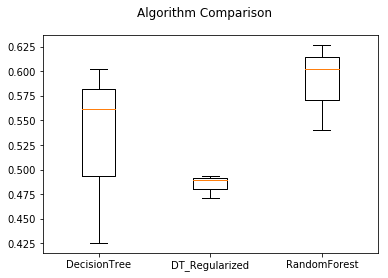

In [13]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=3,random_state=2)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, 
                                                 scoring='recall')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [9]:
results

[array([0.56122449, 0.42528736, 0.60240964])]